## Implementaion of Nbeats on level 3

In [20]:
import import_ipynb
import LevelsCreater as lc
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nbeats_keras.model import NBeatsNet
from numpy import linalg as LA
# from sklearn.utils import check_arrays
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import concat
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller



def series_to_supervised(data, n_in=1, n_out=1, dropnan=False):

    n_vars = 1 if type(data) is list else data.shape[1]
    cols=pd.DataFrame()
    names=list()
    for i in range(n_in, 0, -1):
        df=pd.DataFrame()
        names=list()
        df=data.shift(i)
        names += [('%s(t-%d)' % (data.columns[j], i)) for j in range(n_vars)]
        df.columns=names
        cols = pd.concat([cols, df], axis=1, sort=False)
    for i in range(0, n_out):
        df=pd.DataFrame()
        names=list()
        df=data.shift(-i)
        if i == 0:
            names += [('%s(t)' % (data.columns[j])) for j in range(n_vars)]
        else:
            names += [('%s(t+%d)' % (data.columns[j], i)) for j in range(n_vars)]
            
        df.columns=names
        cols=pd.concat([cols,df],axis=1,sort=False)
    if dropnan:
        cols.dropna(inplace=True)
    return cols

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

levels=lc.LevelsCreater()

path1='Data'
path2='sales_train_validation.csv'

data = pd.read_csv(os.path.join(path1,path2), delimiter=",")
df = levels.level_3(data)
# rmse=[]

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_variable (InputLayer)     (None, 10, 1)        0                                            
__________________________________________________________________________________________________
lambda_9 (Lambda)               (None, 10)           0           input_variable[0][0]             
__________________________________________________________________________________________________
0/0/generic/d1 (Dense)          (None, 64)           704         lambda_9[0][0]                   
                                                                 subtract_33[0][0]                
__________________________________________________________________________________________________
0/0/generic/d2 (Dense)          (None, 64)           4160        0/0/generic/d1[0][0]       

Epoch 8/25
1713/1713 [==============================] - 0s 29us/step - loss: 0.4096 - val_loss: 0.3745
Epoch 9/25
1713/1713 [==============================] - 0s 29us/step - loss: 0.3713 - val_loss: 0.3363
Epoch 10/25
1713/1713 [==============================] - 0s 28us/step - loss: 0.3326 - val_loss: 0.2976
Epoch 11/25
1713/1713 [==============================] - 0s 27us/step - loss: 0.2934 - val_loss: 0.2585
Epoch 12/25
1713/1713 [==============================] - 0s 26us/step - loss: 0.2544 - val_loss: 0.2202
Epoch 13/25
1713/1713 [==============================] - 0s 25us/step - loss: 0.2168 - val_loss: 0.1842
Epoch 14/25
1713/1713 [==============================] - 0s 29us/step - loss: 0.1825 - val_loss: 0.1550
Epoch 15/25
1713/1713 [==============================] - 0s 22us/step - loss: 0.1541 - val_loss: 0.1343
Epoch 16/25
1713/1713 [==============================] - 0s 27us/step - loss: 0.1324 - val_loss: 0.1202
Epoch 17/25
1713/1713 [==============================] - 0s 21us/s

Train on 1709 samples, validate on 189 samples
Epoch 1/25
1709/1709 [==============================] - 0s 187us/step - loss: 0.1599 - val_loss: 0.1288
Epoch 2/25
1709/1709 [==============================] - 0s 22us/step - loss: 0.1285 - val_loss: 0.1011
Epoch 3/25
1709/1709 [==============================] - 0s 26us/step - loss: 0.1019 - val_loss: 0.0835
Epoch 4/25
1709/1709 [==============================] - 0s 22us/step - loss: 0.0826 - val_loss: 0.0730
Epoch 5/25
1709/1709 [==============================] - 0s 25us/step - loss: 0.0712 - val_loss: 0.0685
Epoch 6/25
1709/1709 [==============================] - 0s 33us/step - loss: 0.0656 - val_loss: 0.0670
Epoch 7/25
1709/1709 [==============================] - 0s 30us/step - loss: 0.0629 - val_loss: 0.0657
Epoch 8/25
1709/1709 [==============================] - 0s 19us/step - loss: 0.0611 - val_loss: 0.0641
Epoch 9/25
1709/1709 [==============================] - 0s 22us/step - loss: 0.0594 - val_loss: 0.0622
Epoch 10/25
1709/1709 [==

Train on 1704 samples, validate on 189 samples
Epoch 1/25
1704/1704 [==============================] - 0s 197us/step - loss: 0.3231 - val_loss: 0.2867
Epoch 2/25
1704/1704 [==============================] - 0s 21us/step - loss: 0.2701 - val_loss: 0.2359
Epoch 3/25
1704/1704 [==============================] - 0s 27us/step - loss: 0.2248 - val_loss: 0.1953
Epoch 4/25
1704/1704 [==============================] - 0s 20us/step - loss: 0.1902 - val_loss: 0.1688
Epoch 5/25
1704/1704 [==============================] - 0s 28us/step - loss: 0.1670 - val_loss: 0.1522
Epoch 6/25
1704/1704 [==============================] - 0s 22us/step - loss: 0.1524 - val_loss: 0.1428
Epoch 7/25
1704/1704 [==============================] - 0s 28us/step - loss: 0.1442 - val_loss: 0.1372
Epoch 8/25
1704/1704 [==============================] - 0s 29us/step - loss: 0.1388 - val_loss: 0.1337
Epoch 9/25
1704/1704 [==============================] - 0s 23us/step - loss: 0.1347 - val_loss: 0.1307
Epoch 10/25
1704/1704 [==

Train on 1700 samples, validate on 188 samples
Epoch 1/25
1700/1700 [==============================] - 0s 208us/step - loss: 0.1879 - val_loss: 0.1729
Epoch 2/25
1700/1700 [==============================] - 0s 22us/step - loss: 0.1505 - val_loss: 0.1388
Epoch 3/25
1700/1700 [==============================] - 0s 23us/step - loss: 0.1217 - val_loss: 0.1167
Epoch 4/25
1700/1700 [==============================] - 0s 22us/step - loss: 0.1027 - val_loss: 0.1031
Epoch 5/25
1700/1700 [==============================] - 0s 23us/step - loss: 0.0929 - val_loss: 0.0964
Epoch 6/25
1700/1700 [==============================] - 0s 23us/step - loss: 0.0893 - val_loss: 0.0932
Epoch 7/25
1700/1700 [==============================] - 0s 25us/step - loss: 0.0872 - val_loss: 0.0912
Epoch 8/25
1700/1700 [==============================] - 0s 25us/step - loss: 0.0855 - val_loss: 0.0895
Epoch 9/25
1700/1700 [==============================] - 0s 29us/step - loss: 0.0839 - val_loss: 0.0880
Epoch 10/25
1700/1700 [==

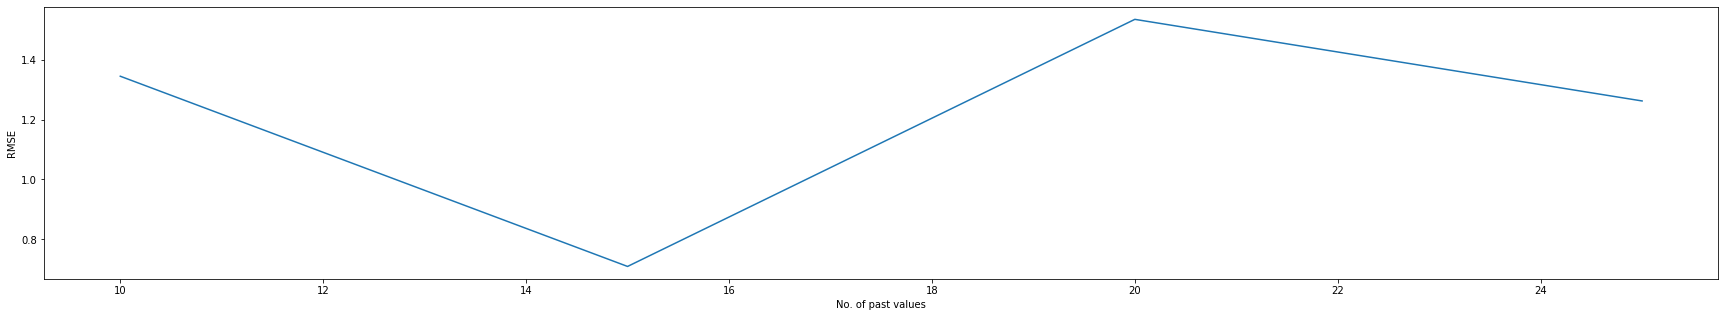

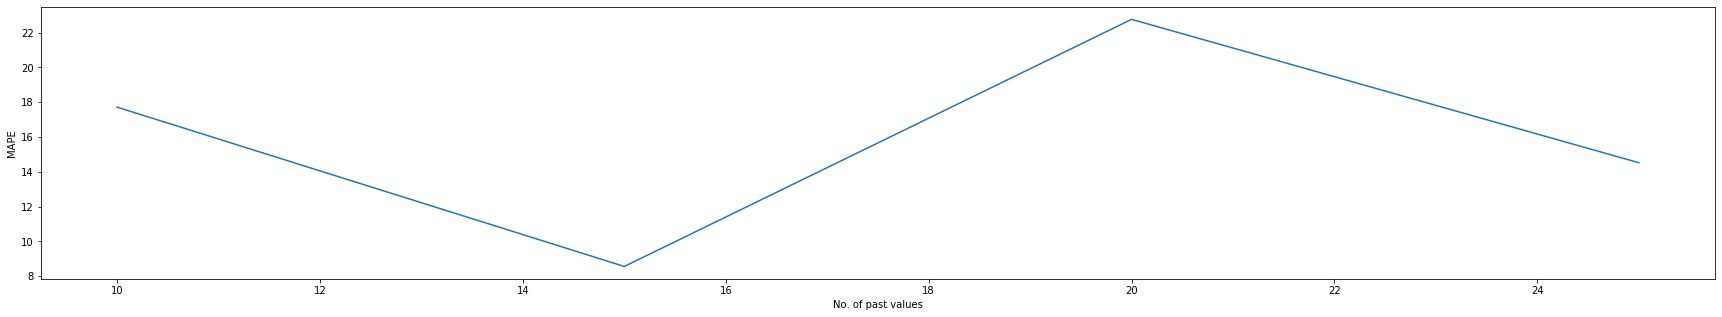

In [11]:
rmse=[]
mape=[]
for mw in [10,15,20,25]:

    newdf=series_to_supervised(pd.DataFrame(df.T['CA_1']),mw,1)
    newdf=newdf.dropna(axis=0)
    x=newdf[newdf.columns[:-1]].values.reshape(df.shape[1]-mw,mw,1)
    y=newdf[newdf.columns[-1]].values.reshape(df.shape[1]-mw,1,1)





    # https://keras.io/layers/recurrent/
    num_samples, time_steps, input_dim, output_dim = df.shape[1]-mw, mw, 1, 1

    model = NBeatsNet(backcast_length=time_steps, forecast_length=output_dim,
                          stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK), nb_blocks_per_stack=2,
                          thetas_dim=(4, 4), share_weights_in_stack=True, hidden_layer_units=64)

    # Definition of the objective function and the optimizer.
    model.compile_model(loss='mae', learning_rate=1e-5)

    # Definition of the data. The problem to solve is to find f such as | f(x) - y | -> 0.
    x = np.random.uniform(size=(num_samples, time_steps, input_dim))
    y = np.mean(x, axis=1, keepdims=True)

    # Split data into training and testing datasets.
    c = num_samples // 10
    x_train, y_train, x_test, y_test = x[c:], y[c:], x[:c], y[:c]

    # Train the model.
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=128)

    # Save the model for later.
    model.save('n_beats_model.h5')

    # Predict on the testing set.
    predictions = model.predict(x_test)
    print(predictions.shape)

    # Load the model.
    model2 = NBeatsNet.load('n_beats_model.h5')

    predictions2 = model2.predict(x_test)
    np.testing.assert_almost_equal(predictions, predictions2)

    rmse.append(LA.norm(predictions.ravel()-y_test[:,0,0],2))
    mape.append(mean_absolute_percentage_error(predictions.ravel(),y_test[:,0,0]))


# fig,ax=plt.subplots()
# ax.plot(predictions.ravel(),linestyle='--',label='prediction')
# ax.plot(y_test[:,0,0],label='target')
# ax.legend()
# plt.show()


fig,ax=plt.subplots()
ax.plot([10,15,20,25],rmse)
ax.set_xlabel('No. of past values')
ax.set_ylabel('RMSE')
fig,ax=plt.subplots()
ax.plot([10,15,20,25],mape)
ax.set_xlabel('No. of past values')
ax.set_ylabel('MAPE')
print(LA.norm(predictions.ravel()-y_test[:,0,0],2))
print(mean_absolute_percentage_error(predictions.ravel(),y_test[:,0,0]))


## Implementaion of ARIMA

C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                 D.CA_1   No. Observations:                 1912
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14869.521
Method:                       css-mle   S.D. of innovations            576.589
Date:                Tue, 28 Apr 2020   AIC                          29753.042
Time:                        19:13:32   BIC                          29791.934
Sample:                             1   HQIC                         29767.355
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6492      4.031      0.161      0.872      -7.252       8.551
ar.L1.D.CA_1    -0.2855      0.018    -15.450      0.000      -0.322      -0.249
ar.L2.D.CA_1    -0.4961      0.017    -29.44

C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



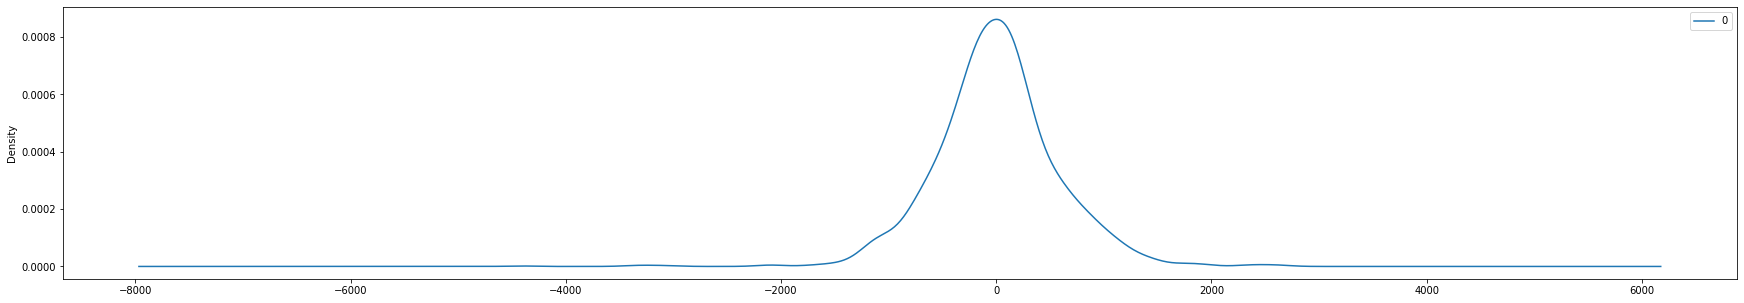

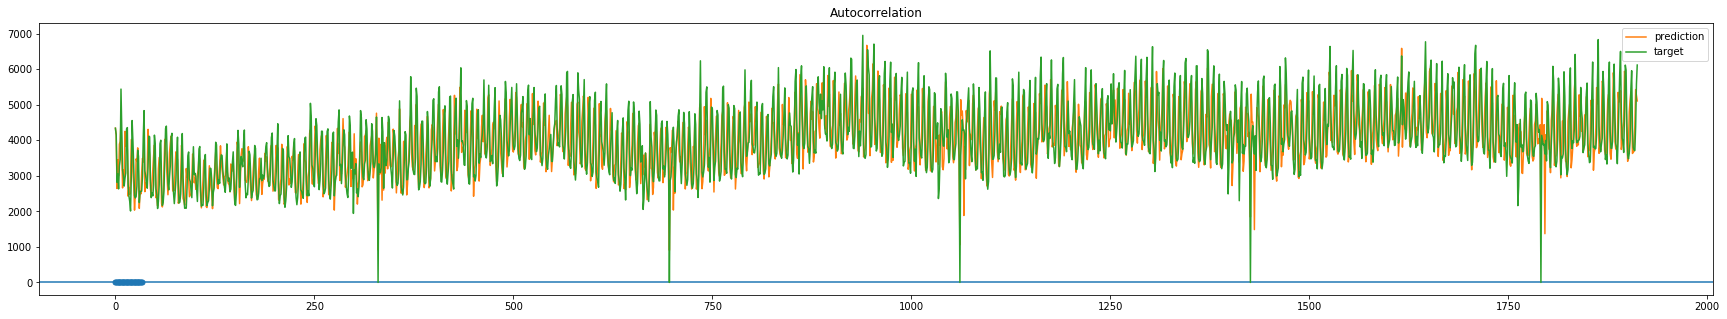

ADF Statistic: -2.035408
p-value: 0.271267
Critical Values:
MAPE error: 13.330386207124995


C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [21]:
model = ARIMA(df.iloc[0], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot(kind='kde')
predictions=model_fit.forecast()
plot_acf(df.iloc[0].values)
# print(mean_absolute_percentage_error(predictions.ravel(),y_test[:,0,0]))
plt.plot(model_fit.predict(1,df.iloc[0].shape[0],typ='levels'),label='prediction')
plt.plot(df.iloc[0].values,label='target')
plt.legend()
plt.show()


X = df.iloc[0].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')




print('MAPE error:',mean_absolute_percentage_error(model_fit.predict(1,df.iloc[0].shape[0],typ='levels'),df.iloc[0].values))







In [4]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
model_fit.predict(1,df.iloc[0].shape[0],typ='levels')

C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0       4337.649243
1       4131.619150
2       2642.261561
3       3447.288006
4       3001.316102
           ...     
1908    3685.005293
1909    4408.324660
1910    5424.329803
1911    5265.255029
1912    5103.284872
Length: 1913, dtype: float64

In [27]:
import plotly.express as px
obd=pd.DataFrame({'Target':df.iloc[0].values,'Prediction':model_fit.predict(1,df.iloc[0].shape[0],typ='levels')})
obd.shape
fig=px.line(obd,x=obd.index,y='Target')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\sujalpb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [36]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=obd.index.values, y=obd['Target'].values,name='Target'))
fig.add_trace(go.Scatter(x=obd.index.values, y=obd['Prediction'].values,name='Prediction'))
fig.update_layout(showlegend=True)
fig.update_xaxes(rangeslider_visible=True)
# fig = go.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])])
fig.show()